# EDA: Parkinson's Disease Detection (UCI ML Repository)
 
**Цель**: Понять структуру данных, проверить баланс классов и признаки для последующего обучения модели XGBoost.
 
**Источник**: Max Little, University of Oxford (197 записей, 23 признака, 31 пациент)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
from pathlib import Path


project_root = Path().resolve().parent

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

reports_path = project_root / 'reports' 

In [3]:
from src.data.make_dataset import load_data


# Загрузка
df = load_data()
print(f"✅ Загружено: {df.shape[0]} записей, {df.shape[1]} столбцов")
df.head()

✅ Загружено: 195 записей, 23 столбцов


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Общая информация о датасете

In [4]:
print("Описание:")
print("- 197 голосовых записей от 31 пациента")
print("- 23 признака: частота, джиттер, шиммер, шум/тон, нелинейные меры")
print("- Целевая переменная: `status` (0 = здоров, 1 = болен Паркинсоном)\n")

print("Размер:", df.shape)
print("Пропусков:", df.isnull().sum().sum())

print("\nРаспределение классов:")
class_counts = df["status"].value_counts()
print(f"- {class_counts.iloc[0]} с Паркинсоном")
print(f"- {class_counts.iloc[1]} без")
print("\nНесбалансированность: {:.1%} больных".format(class_counts[1] / len(df)))

Описание:
- 197 голосовых записей от 31 пациента
- 23 признака: частота, джиттер, шиммер, шум/тон, нелинейные меры
- Целевая переменная: `status` (0 = здоров, 1 = болен Паркинсоном)

Размер: (195, 23)
Пропусков: 0

Распределение классов:
- 147 с Паркинсоном
- 48 без

Несбалансированность: 75.4% больных


## Баланс классов

ValueError: save_path должен указывать на файлс расширением (например, .png), но получена папка: /home/mojusei/Data/ML/parkisnons-detection/reports/class_balance

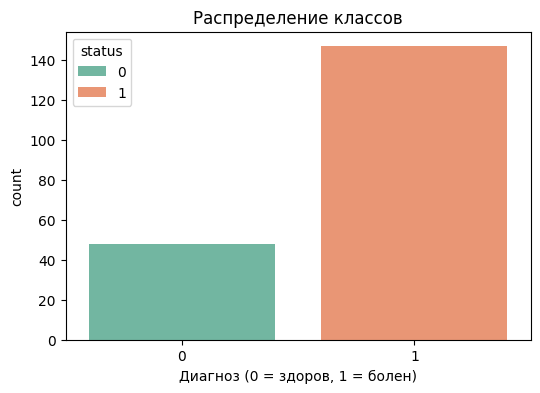

In [5]:
from src.visualization.visualize import plot_class_balance


plot_class_balance(df, save_path=reports_path / 'class_balance')

## Статистика признаков

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## Корреляция признаков с целевой переменной

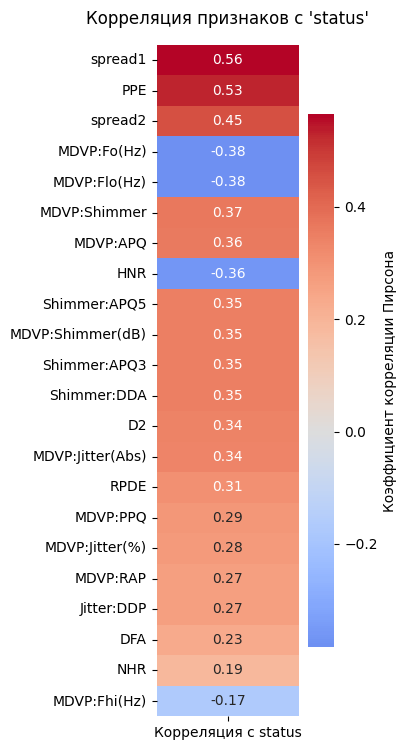

In [6]:
from src.visualization.visualize import plot_target_correlation


plot_target_correlation(df=df, save_path=reports_path / 'correlation_heatmap.png')

## Распределение ключевых признаков по классам

In [ ]:
# Выберем топ-3 по корреляции
top_features = correlation_with_target.head(3).index.tolist()
df_melt = df_clean.melt(id_vars=["status"], value_vars=top_features)

plt.figure(figsize=(12, 5))
sns.boxplot(data=df_melt, x="variable", y="value", hue="status", palette=["#4CAF50", "#F44336"])
plt.title("Распределение наиболее информативных признаков")
plt.xticks(rotation=15)
plt.legend(title="Статус", labels=["Здоров", "Болен"])
plt.tight_layout()
plt.show()

## Матрица корреляции (тепловая карта)

In [ ]:
# plt.figure(figsize=(14, 12))
# corr = df_clean.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# sns.heatmap(corr, mask=mask, cmap="RdBu_r", center=0, square=True, linewidths=0.5, annot=False)
# plt.title("Матрица корреляции всех признаков")
# plt.tight_layout()
# plt.show()

## 📌 Выводы из EDA
 - ✅ **Нет пропущенных значений** — данные чистые.
 - ⚠️ **Несбалансированность**: ~75% записей — от больных (150/197).  
 - 🔍 **Высокая предсказуемость**: многие признаки сильно коррелируют с `status` (особенно PPE, spread1, D2).
 - 🧠 **Нет утечки данных**: `name` удалён — модель не "запоминает" пациентов.
 - 📈 **Масштаб признаков разный** → будем использовать `StandardScaler` для согласованности.
 
 **Ожидание**: XGBoost без тонкой настройки должен дать **>95% accuracy**.

In [ ]:
# Сохраним информацию для следующих шагов
print("➡️ Готовы к предобработке и обучению!")